In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

In [2]:
cac40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40')[4]
cac40

,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA
5,BNP Paribas,Financial Services,Diversified Banks,BNP.PA
6,Bouygues,Industrials,Construction & Engineering,EN.PA
7,Capgemini,Technology,IT Consulting & Other Services,CAP.PA
8,Carrefour,Consumer Defensive,Hypermarkets & Super Centers,CA.PA
9,Crédit Agricole,Financial Services,Regional Banks,ACA.PA


In [3]:
Tickers = cac40.iloc[[5], [3]]
symbols = Tickers['Ticker'].to_list()
symbols

['BNP.PA']

In [4]:
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [5]:
data_1 = yf.Ticker(symbols[0])
BNP = data_1.history(interval ='1d', start = '2013-3-28', end = '2023-3-28')

In [6]:
BNP = BNP[['Close']]
BNP

,Close
Date,
2013-03-28 00:00:00+01:00,21.871180
2013-04-02 00:00:00+02:00,22.354599
2013-04-03 00:00:00+02:00,21.901224
2013-04-04 00:00:00+02:00,21.756472
2013-04-05 00:00:00+02:00,21.447851
...,...
2023-03-21 00:00:00+01:00,51.172985
2023-03-22 00:00:00+01:00,50.920578
2023-03-23 00:00:00+01:00,49.808121


Text(0, 0.5, 'Price')

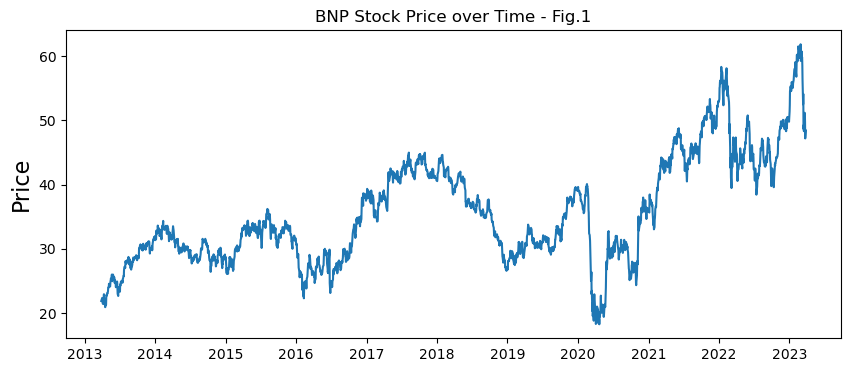

In [7]:
plt.figure(figsize=(10,4))
plt.plot(BNP.Close)
plt.title('BNP Stock Price over Time - Fig.1')
plt.ylabel('Price', fontsize=16)

- We can use statsmodels to perform a decomposition of this time series.  

- The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns.  

- With statsmodels we will be able to see the trend, seasonal, and residual components of our data.

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

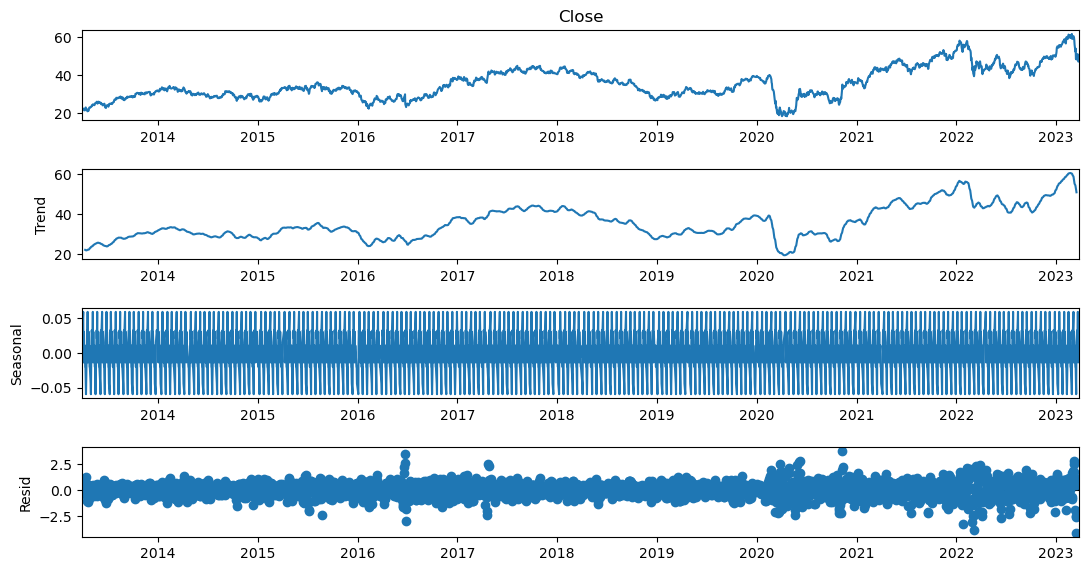

In [9]:
decompose = seasonal_decompose(BNP.Close,model = 'additive',period = 12)
fig_1 = decompose.plot()
fig_1.set_size_inches(12,6)

**We can check stationarity using the following:**

- **Plotting Rolling Statistics:** We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year (last 12 months).

- **Augmented Dickey Fuller (ADF) test:** is one of the statistical tests for checking stationarity. The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.

**Plotting Rolling Statistics**  

We observe that the rolling mean and Standard deviation are not constant with respect to time
The time series is hence not stationary

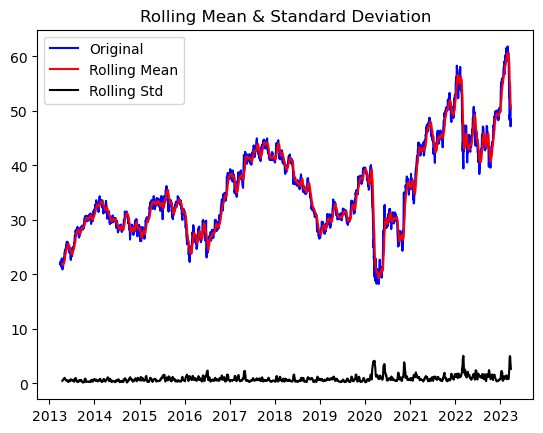

In [10]:
#Determing rolling statistics
rolmean = pd.Series(BNP.Close).rolling(window=12).mean()
rolstd = pd.Series(BNP.Close).rolling(window=12).std()


#Plot rolling statistics:
orig = plt.plot(BNP, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

**Augmented Dickey-Fuller Test:** 

- Null hypothesis: The time series is not stationary
- Rejecting the null hypothesis (p-value < 0.05) will indicate  staionarity

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(BNP.Close, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -2.346770
p-value                           0.157327
#Lags Used                       13.000000
Number of Observations Used    2547.000000
dtype: float64


In [13]:
# p-value > 0.05 , the function is not stationary

**Let's built a function for testing stationarity**

In [14]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()


    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])   
    print (dfoutput)

**Making Time Series Stationary**  

There are 2 major reasons behind non-stationaruty of a time serie:

- Trend – varying mean over time.  

- Seasonality – variations at specific time-frames. 

**Transformations**
- We can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:

Text(0.5, 1.0, 'Log transformation - Fig.3')

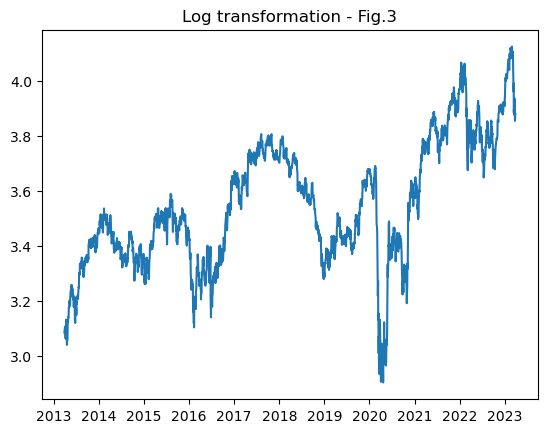

In [19]:
BNP_log = np.log(BNP.Close)
plt.plot(BNP_log)
plt.title('Log transformation - Fig.3')

**Techniques to remove Seasonality and Trend**
 

**Differencing**  

- In this technique, we take the difference of the observation at a particular instant with that at the previous instant.
- First order differencing in Pandas

Text(0.5, 1.0, '1st Differenciation - Fig.4')

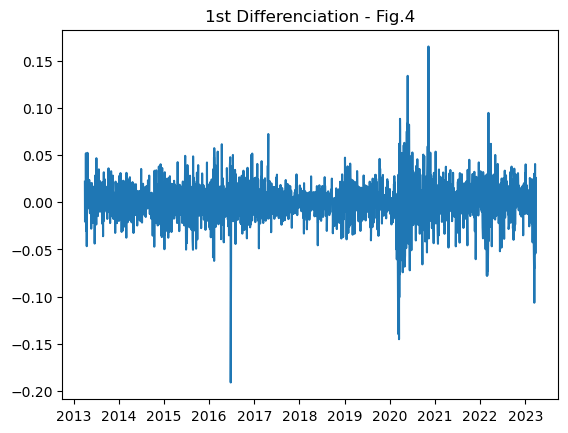

In [20]:
returns = BNP_log - BNP_log.shift(1)
plt.plot(returns)
plt.title('1st Differenciation - Fig.4')

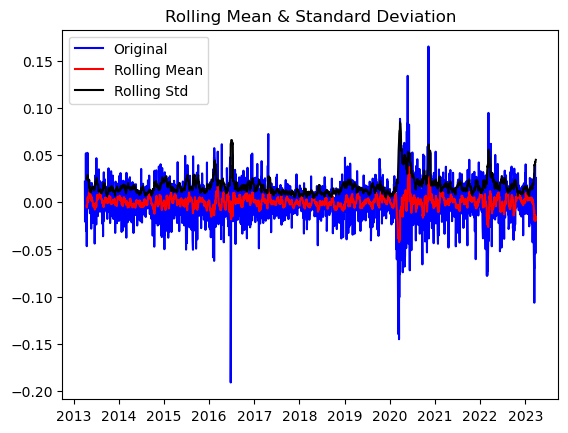

Test Statistic                -1.401773e+01
p-value                        3.617497e-26
#Lags Used                     1.200000e+01
Number of Observations Used    2.547000e+03
dtype: float64


In [21]:
returns.dropna(inplace=True)
test_stationarity(returns)

In [24]:
# P-value < 0.05, the serie is stationary

It can ben observed from Fig.4 There is obvious "clustering" phenomenon in the fluctuation, and the fluctuation is very small in some time periods, but very large in other time periods, so it can be considered that there is a high probability of conditional heteroscedasticity in the error term

**Forecasting Model**

**ARIMA**

In [59]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(returns, trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-12693.165, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-12695.201, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-12697.237, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-12697.060, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-12696.600, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-12696.339, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-12695.756, Time=0.47 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-12693.509, Time=0.85 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-12698.679, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-12697.805, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-12697.213, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-12698.499, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12694.908, Time=0.50 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.782 seco

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2560
Model:               SARIMAX(1, 0, 0)   Log Likelihood                6351.340
Date:                Thu, 01 Jun 2023   AIC                         -12698.679
Time:                        10:34:15   BIC                         -12686.984
Sample:                             0   HQIC                        -12694.439
                               - 2560                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0399      0.012      3.402      0.001       0.017       0.063
sigma2         0.0004   4.77e-06     85.823      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10065.18
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(returns, order=(1,0,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2560
Model:                 ARIMA(1, 0, 0)   Log Likelihood                6351.619
Date:                Thu, 01 Jun 2023   AIC                         -12697.237
Time:                        10:34:15   BIC                         -12679.694
Sample:                             0   HQIC                        -12690.876
                               - 2560                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.738      0.460      -0.001       0.001
ar.L1          0.0397      0.012      3.382      0.001       0.017       0.063
sigma2         0.0004   4.81e-06     85.167      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10064.13
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

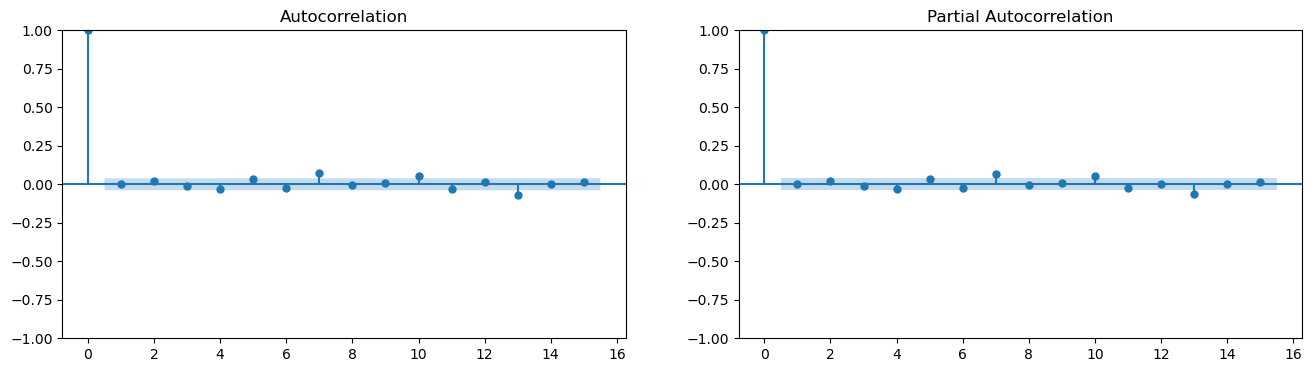

In [56]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(16, 4)
plot_acf(model.resid, lags=15, ax=axs[0]);
plot_pacf(model.resid, lags=15, ax=axs[1]);

In [57]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [65]:
acorr_ljungbox(model.resid, lags=[15], return_df=True)

,lb_stat,lb_pvalue
15,45.205173,0.000071


- p-value < 0.05, we can therefore reject the null hypothesis, indicating that the time series contains autocorrelation.
- the residuals of our time series model are not independent
- Not a good fit ...